In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
from collections import namedtuple

import matplotlib.pyplot as plt 
import cv2 
import json
import numpy as np

import ritnet
import nia22
from glob import glob

from matplotlib.patches import Ellipse
from nia22.scenario import Info
from nia22.mask_utils import gen_mask

1. 라벨의 좌 우 끝이 평행이 되도록 자르기
2. RITnet에 맞는 적절한 크기로 (상하좌우 dx * 2 정도?) 
3. 640 * 400으로 resize
4. 눈 한 쪽씩 / 두눈 다 

In [3]:
ddir = "/home/di/Work/data1/NIA2022/ORG/"
vid_dir_base = "/mnt/syn2422/raw/raw/by_id/"

In [105]:
uid = "009"

pattern = ddir + f"{uid}/*.json"

json_list = glob(pattern)
json_list.sort()
print(f"{len(json_list)} JSON files are found")

12862 JSON files are found


In [128]:
all_scenarios = []
for jl in json_list:
    code = jl[-14:-9]
    all_scenarios.append(code)

scenario_set = set(all_scenarios)

In [7]:
pattern

'/home/di/Work/data1/NIA2022/ORG/34/*.json'

In [ ]:
ddir = "/home/di/Work/data1/NIA2022/ORG/"
vid_dir_base = "/mnt/syn2422/raw/raw/by_id/"

# data dir
dout_dir = "../../dataset_rit_nia/"
os.makedirs(dout_dir, exist_ok=True)

# cropped img 
png_dir = dout_dir+'images/'
os.makedirs(png_dir, exist_ok=True)

# npy label
label_dir = dout_dir+'labels/'
os.makedirs(label_dir, exist_ok=True)

for uid in range(9, 35):
    uid = f"{uid:03d}"
    pattern = ddir + f"{uid}/*.json"
    json_list = glob(pattern)
    json_list.sort()
    print(f"{len(json_list)} JSON files are found")
    
    ####
    all_scenarios = []
    for jl in json_list:
        code = jl[-14:-9]
        all_scenarios.append(code)

    scenario_set = set(all_scenarios)
    
    ####
    for ss in scenario_set:
        file = Info(base_dir = ddir + f"{uid}/", scen = ss)
        file.vid_dir = vid_dir_base + f"{file.id}/T1/{file.device_d}/RGB/"
        fn_vid = file.vid_dir + file.fn_vid

        cap = cv2.VideoCapture(fn_vid)
        if cap.isOpened():
            for ff, fn_json in file:
                try:
                    anno = json.load(open(file._dir + fn_json,"r"))
                    cap.set(cv2.CAP_PROP_POS_FRAMES, ff)
                    ok, frame = cap.read()
                    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                    fn = file._fn_base + f"_{ff}"
                    err = gen_mask(frame, anno, fn, png_dir, label_dir)
                except:
                    print("something wrong", fn_json)
        else:
            print("Can't open video file")
            print(">>>", fn_vid)



12862 JSON files are found
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_S_D_L.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_T_rgb_A_S_R.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_S_C_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_F_H_L.mp4 is missin

/home/di/Work/nia/nia/nia22/eyes.py:94: RuntimeWarning: divide by zero encountered in true_divide
  rad_cc = (xct**2/ra**2) + (yct**2/rb**2)
/home/di/Work/nia/nia/nia22/eyes.py:94: RuntimeWarning: invalid value encountered in true_divide
  rad_cc = (xct**2/ra**2) + (yct**2/rb**2)


not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S01_V_rgb_F_D_T.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_M_rgb_D_U_T.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_N_L_R.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_T_rgb_S_P_T.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_S_P_L.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warn

[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_M_rgb_A_C_T.mp4 is missing!
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_T_rgb_S_L_T.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_D_T_R.mp4 is missing!
something wrong NIA22EYE_S1_009_T1_S10_S_rgb_D_T_R_058.json
something wrong NIA22EYE_S1_009_T1_S10_S_rgb_D_T_R_250.json
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S09_V_rgb_D_C_T.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S09_L_rgb_D_E_T.mp4 is mi

not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S09_L_rgb_A_U_T.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_T_rgb_F_D_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_D_F_R.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_F_P_L.mp4 is missing!
something wrong NIA22EYE_S1_009_T1_S10_S_rgb_F_P_L_106.json
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_009_T1_S10_S_rgb_F_T_R.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/009/NIA22EYE_S1_0

[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_T_rgb_S_P_L.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_F_T_L.mp4 is missing!
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_T_rgb_D_U_R.mp4 is missing!
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_A_C_R.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_N_F_L.mp4 is missing!
not enough labels. Eyes are closed?
[Warn

not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_T_rgb_F_S_R.mp4 is missing!
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_V_rgb_S_C_T.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes ar

/home/di/Work/nia/nia/nia22/eyes.py:120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask = np.maximum.reduce([mask, iris_mask, pupil_mask])


something wrong NIA22EYE_S1_010_T1_S10_T_rgb_N_P_R_122.json
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_F_L_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_D_C_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_A_C_L.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_A_T_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/010/NIA22EYE_S1_010_T1_S10_S_rgb_S_F_R.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels

[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S10_T_rgb_S_C_L.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S00_S_rgb_F_H_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S00_T_rgb_F_U_R.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S00_T_rgb_N_P_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S10_S_rgb_A_F_T.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S10_T_rgb_A_D_R.mp4 is missing!
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S10_S_rgb_A_L_T.mp4 is missing!
[Wa

[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S00_S_rgb_F_C_R.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S02_M_rgb_N_E_T.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S03_M_rgb_A_E_T.mp4 is missing!
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
not enough labels. Eyes are closed?
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S00_S_rgb_N_E_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S00_S_rgb_D_E_L.mp4 is missing!
[Warning], Can't find the video file...
/home/di/Work/data1/NIA2022/ORG/011/NIA22EYE_S1_011_T1_S10_S_rgb_S_D_R.mp4 is missing!
not enough labels. Eye

In [1]:
# 2. load image
cap.set(cv2.CAP_PROP_POS_FRAMES, file.frames[0])
ok, frame = cap.read()
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


plt.close("all")
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
fig.set_size_inches(16,9)

# 피사체의 왼쪽 눈
iris = eye.l_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse1 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse1)

# 공막
p_left_eye = np.array(eye.l_eyelid['points'])
plt.scatter(p_left_eyes[:,0], p_left_eyes[:,1], s=10)


#피사체의 오른쪽 눈
iris = eye.r_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse2 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse2)

p_right_eye = np.array(eye.r_eyelid['points'])
plt.scatter(p_right_eyes[:,0], p_right_eyes[:,1], s=10)


ax.imshow(frame)


plt.show()

NameError: name 'cap' is not defined

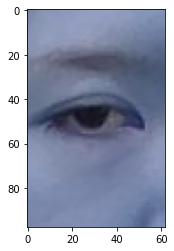

In [54]:
area, cropped = nia22.eyes.crop_eye(frame, p_left_eye)


plt.imshow(cropped)

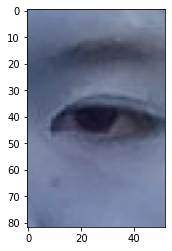

In [55]:
area, cropped = nia22.eyes.crop_eye(frame, p_right_eye)


plt.imshow(cropped)

In [4]:
# 3. (optional) rotate image 

In [ ]:
# 5. keep track of rotation and transplation info.